<a href="https://colab.research.google.com/github/Geometallurgy/RLM_LCT_notebooks/blob/main/geomet_salobo_icj_ufmg_Exp_Log_Reg_backup1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font size = 12 color = royalblue> INTRODUÇÃO </font>
***

Modelagem Geometalúrgica - Estudo de Caso da Mina de Cobre do Salobo (Vale) - Exponential regression/Logarithmic regression

**Autor(a):**

João Vitor Figueiredo Guerra


**Orientador:** Douglas B. Mazzinghy

Instituição: Departamento de Engenharia de Minas da UFMG


##  BIBLIOTECAS

In [ ]:
import numpy as np # Biblioteca para operações matemáticas eficientes com arrays
import pandas as pd # Importação e manipulação de dados em DataFrames
import matplotlib.pyplot as plt # Criação de gráficos estáticos

#------------ basicos ---------------------
import itertools
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import math
import seaborn as sns # Criação de gráficos estatísticos mais avançados
# Statsmodels: a biblioteca principal para modelagem e análise estatística
import statsmodels.api as sm
# Módulos específicos do Statsmodels para testes estatísticos e diagnósticos
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import qqplot # Para Q-Q plot dos resíduos
from statsmodels.graphics.tsaplots import plot_acf # Para plot de autocorrelação dos resíduos
from statsmodels.stats.diagnostic import het_breuschpagan, het_goldfeldquandt,het_white
from statsmodels.stats.diagnostic import linear_harvey_collier, linear_reset, spec_white
from statsmodels.stats.diagnostic import linear_rainbow
from statsmodels.graphics.regressionplots import plot_leverage_resid2

from statsmodels.stats.outliers_influence import OLSInfluence, variance_inflation_factor

# Biblioteca para suprimir avisos de código
import warnings
warnings.filterwarnings("ignore")


***
# <font size = 12 color = green> CONHECENDO DADOS </font>
***


## [1] BAIXANDO DATASET

O dataset flotation.csv é um conjunto de dados geometalúrgicos voltado para a flotação. Ele contém dados de diversas amostras de minério , e as respectivas medições de variáveis(teores) que influenciam o processo de tratamento do minério bruto.

In [ ]:
url1 = 'https://zenodo.org/records/7051975/files/comminution.csv?download=1' #link do dataset utilizado;

df_comminution = pd.read_csv(url1) # df é nome do dataframe que vai carregar os dados iniciais das amostras e o resultado do calculo do Bond Work Index (BWI) - *Não utilizado nesse notebook*.

s = 'https://zenodo.org/record/7051975/files/flotation.csv?download=1' #link do dataset utilizado;

df_flotation = pd.read_csv(s) # df é nome do dataframe que vai carregar os dados iniciais das amostras e o resultado do calculo de Recuperação Metalúrgica (LCT).

url3 = 'https://zenodo.org/record/7051975/files/drillholes.csv?download=1'  #link do dataset utilizado;

df_drillholes = pd.read_csv(url3) # df é nome do dataframe que vai carregar os dados dos furos. - *Não utilizado nos calculos desse notebook*

##[3] VISUALIZAÇÃO DOS DADOS

In [ ]:
#Mostra amostras de dados presentes em todos os datasets
print("\n=== COMMINUTION ===")
print(df_comminution.head())

print("\n=== FLOTATION ===")
print(df_flotation.head())

print("\n=== DRILLHOLES ===")
print(df_drillholes.head())


=== COMMINUTION ===
   HOLEID           X          Y       Z       th1       th2       th3  \
0     120  342.445175 -382.72032  337.81  0.042350  0.176221  0.402691   
1     121  127.095175  -88.51032  251.62  0.038470  0.191321  0.410466   
2     122  186.685175 -344.57032  334.54  0.030830  0.151751  0.326471   
3     123  297.195175 -219.90032  266.55  0.031255  0.196491  0.419411   
4     124  365.475175 -180.95032  264.01  0.038660  0.168131  0.382681   

           F80         P80         M  ...         Fe ppm         K ppm  \
0  2174.237514   97.105344  0.808429  ...  287065.387485  20113.863021   
1  2188.542916  115.508073  0.855116  ...  229643.336529  28938.287402   
2  1983.825716  102.098877  0.973609  ...  239465.402844  22656.358382   
3  1969.796571  116.762223  1.047199  ...  272844.696970  25535.603113   
4  2222.819841  100.826620  1.155266  ...  238553.639847  26901.626794   

        Mg ppm       Mn ppm       Na ppm       P ppm   S ppm         Si ppm  \
0  6621.98

In [ ]:
# Criar o gráfico de dispersão 3D
fig = go.Figure()

# Adicionar amostras de furos de sondagem
fig.add_trace(go.Scatter3d(
    x=df_drillholes['X'],
    y=df_drillholes['Y'],
    z=df_drillholes['Z'],
    mode='markers',
    marker=dict(
        size=2,
        color='gray',
        opacity=0.8
    ),
    name='2000 drillholes samples',
    legendgrouptitle_text="Dataset Types",
    legendgroup="drillholes"
))

# Adicionar amostras de cominuição
fig.add_trace(go.Scatter3d(
    x=df_comminution['X'],
    y=df_comminution['Y'],
    z=df_comminution['Z'],
    mode='markers',
    marker=dict(
        size=2,
        color='magenta',
        opacity=0.8
    ),

    name='60 comminution samples',
    legendgroup="comminution"
))

# Adicionar amostras de flotação
fig.add_trace(go.Scatter3d(
    x=df_flotation['X'],
    y=df_flotation['Y'],
    z=df_flotation['Z'],
    mode='markers',
    marker=dict(
        size=2,
        color='cyan',
        opacity=0.8
    ),
    name='53 flotation samples',
    legendgroup="flotation"
))

# Atualizar layout para melhor visualização COM FUNDO BRANCO
fig.update_layout(
    paper_bgcolor='white',  # Fundo branco ao redor do gráfico
    plot_bgcolor='white',   # Fundo branco da área do gráfico

    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
        aspectmode='data',  # Garante a proporção correta para gráficos 3D

        # Configurações para fundo branco na cena 3D
        bgcolor='white',    # Fundo branco para a cena 3D

        # Opcional: personalizar as cores dos eixos para melhor contraste
        xaxis=dict(backgroundcolor="white", gridcolor="lightgray"),
        yaxis=dict(backgroundcolor="white", gridcolor="lightgray"),
        zaxis=dict(backgroundcolor="white", gridcolor="lightgray")
    ),

    title='Visualização 3D do Conjunto de Dados',
    showlegend=True,
    legend=dict(
        itemsizing='constant',  # Mantém o tamanho constante dos marcadores na legenda
        tracegroupgap=20,       # Aumenta o espaçamento entre os itens da legenda
        font=dict(size=12)      # Aumenta o tamanho da fonte da legenda
    )
)

# Personalizar a legenda para ter marcadores maiores
fig.update_traces(
    marker=dict(sizeref=0.1),  # Ajusta a escala dos marcadores na legenda
    selector=dict(mode='markers')
)

# Exibir o gráfico
fig.show()

In [ ]:
coordinate_columns = ['X', 'Y', 'Z']
# Painel de estatísticas descritivas para cada teor do dataset flotation
fteor_columns = [col for col in df_flotation.columns if col not in coordinate_columns and df_flotation[col].dtype in ['int64', 'float64']]

print("\n" + "="*60)
print("ESTATÍSTICAS DESCRITIVAS DOS TEORES DA TABELA DE FLOTAÇÃO")
print("="*60)

for teor in fteor_columns:
    print(f"\n{teor}:")
    print(f"  Mínimo: {df_flotation[teor].min():.4f}")
    print(f"  Máximo: {df_flotation[teor].max():.4f}")
    print(f"  Média: {df_flotation[teor].mean():.4f}")
    print(f"  Mediana: {df_flotation[teor].median():.4f}")
    print(f"  Desvio Padrão: {df_flotation[teor].std():.4f}")


ESTATÍSTICAS DESCRITIVAS DOS TEORES DA TABELA DE FLOTAÇÃO

HOLEID:
  Mínimo: 1.0000
  Máximo: 133.0000
  Média: 31.0566
  Mediana: 15.0000
  Desvio Padrão: 32.4176

fr:
  Mínimo: 0.1644
  Máximo: 0.3830
  Média: 0.2480
  Mediana: 0.2352
  Desvio Padrão: 0.0510

xr:
  Mínimo: 0.0060
  Máximo: 0.0797
  Média: 0.0404
  Mediana: 0.0368
  Desvio Padrão: 0.0180

LCT:
  Mínimo: 0.7176
  Máximo: 0.9678
  Média: 0.8789
  Mediana: 0.8938
  Desvio Padrão: 0.0532

Ag ppm:
  Mínimo: 1.1630
  Máximo: 12.1011
  Média: 4.2273
  Mediana: 4.0725
  Desvio Padrão: 1.8502

Al ppm:
  Mínimo: 3932.1600
  Máximo: 65997.6041
  Média: 47728.3600
  Mediana: 50624.6305
  Desvio Padrão: 13968.3953

Au ppm:
  Mínimo: 0.0520
  Máximo: 4.5210
  Média: 0.7783
  Mediana: 0.4200
  Desvio Padrão: 0.9374

C ppm:
  Mínimo: 150.0000
  Máximo: 2865.0000
  Média: 721.3491
  Mediana: 607.0000
  Desvio Padrão: 524.3843

Ca ppm:
  Mínimo: 1068.9330
  Máximo: 39178.0056
  Média: 9810.1159
  Mediana: 6870.3700
  Desvio Padrão: 76

***
# <font size = 12 color = seablue> MODELO PARA FLOTAÇÃO </font>
***

## [1] CORRELAÇÃO DE VARIAVÉIS DO DATASET DE FLOTAÇÃO



In [ ]:
correlacao_lct = df_flotation.corr()["LCT"]

indices_ordenados_lct = correlacao_lct.abs().sort_values(ascending=False).index

correlacao_final_lct = correlacao_lct.loc[indices_ordenados_lct]
print(correlacao_final_lct)
#Para avaliar os dados a serem tratados  ao longo do processo foi feita uma matriz de correlação

LCT       1.000000
P ppm     0.384213
Na ppm    0.355076
U ppm     0.319124
HOLEID   -0.299982
Ca ppm    0.260416
X         0.255369
S ppm     0.253890
Y        -0.216998
Th ppm    0.194382
Fe ppm   -0.166833
Si ppm    0.142981
F ppm    -0.140369
Au ppm    0.136067
xr        0.125551
Mn ppm   -0.120639
Ag ppm   -0.107729
Cl ppm   -0.092207
K ppm     0.073175
Cu ppm    0.071574
fr       -0.063832
Al ppm    0.057436
Mg ppm    0.043904
Ti ppm    0.024532
Z        -0.015502
C ppm     0.007737
Name: LCT, dtype: float64


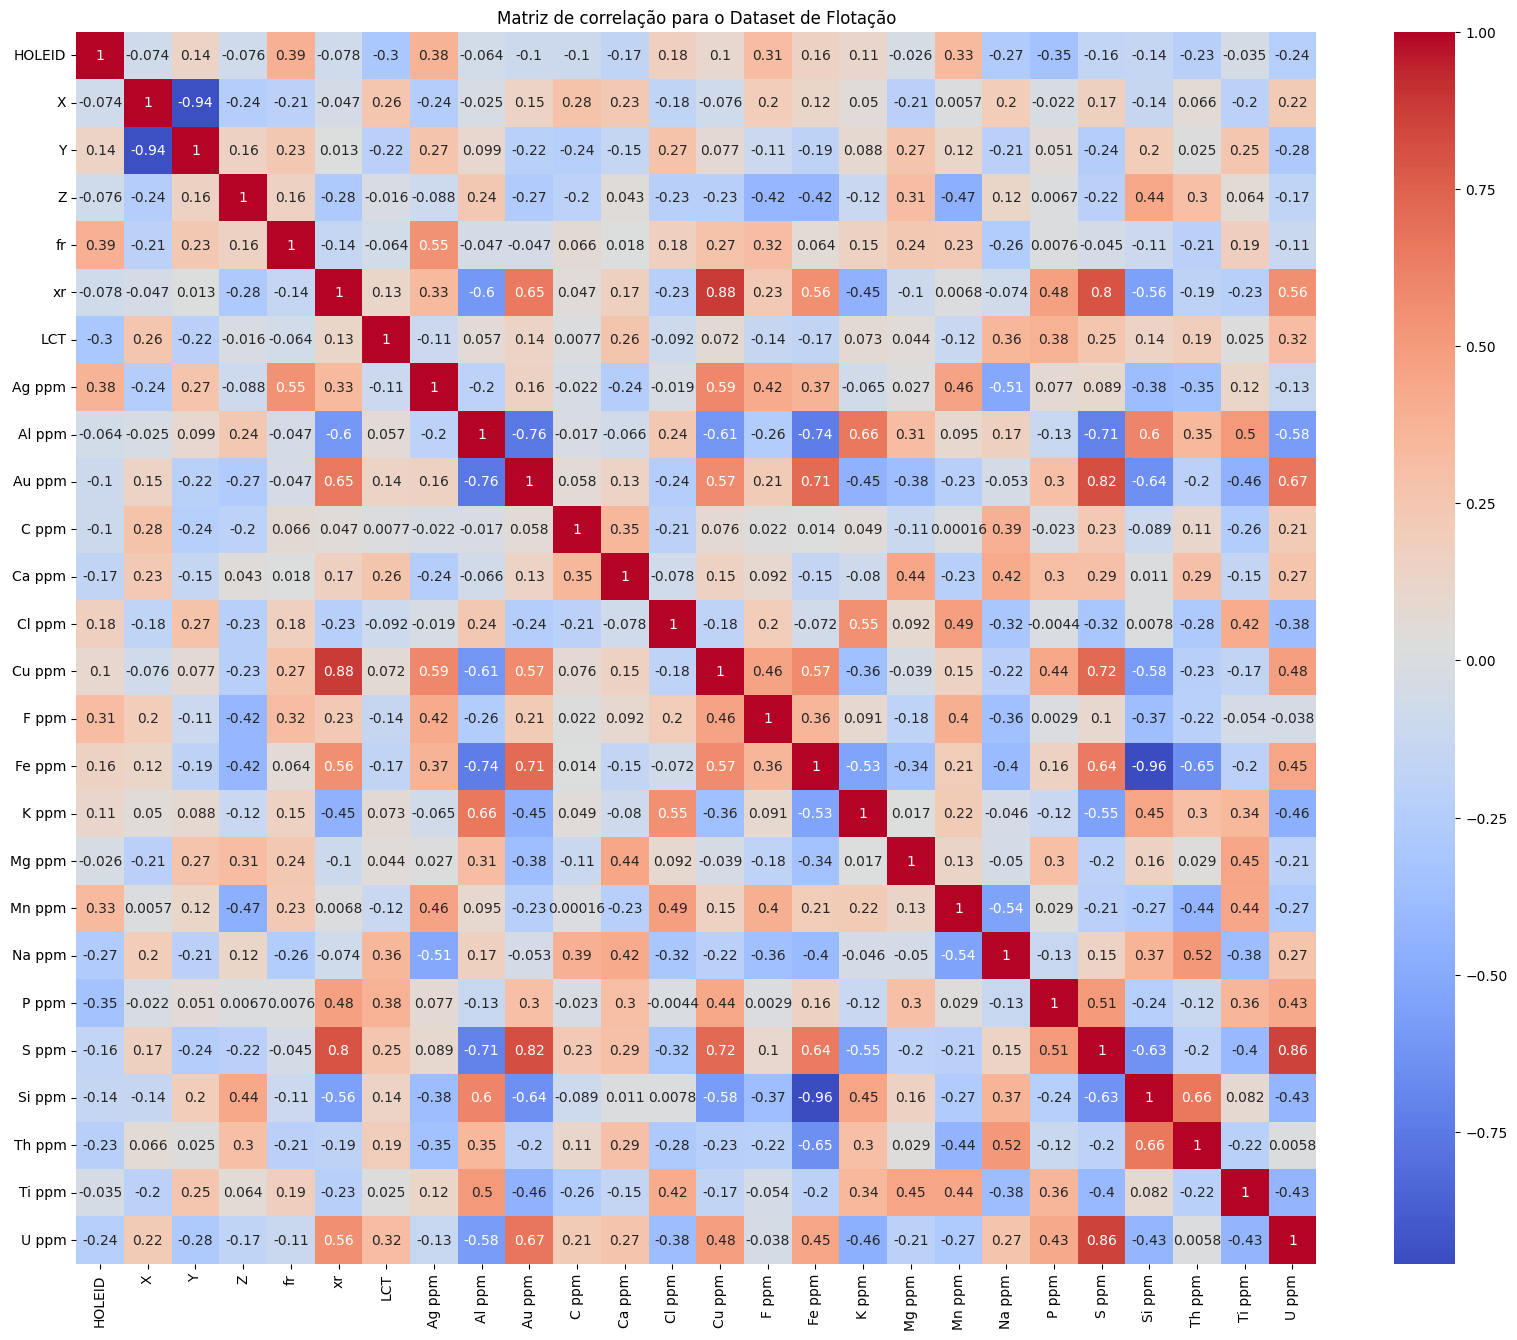

In [ ]:
plt.figure(figsize=(20, 16))

sns.heatmap(df_flotation.corr(), annot=True, cmap="coolwarm")

plt.title('Matriz de correlação para o Dataset de Flotação')
plt.show()

## [2] PREPARAÇÃO PARA APLICAÇÃO DOS PRIMEIROS METODOS DE EXPONENCIAL/LOARITHMIC REGRESSION

In [ ]:
df_temp_flotation = df_flotation.copy()

colunas_para_remover_flotation = ["HOLEID", "LCT", "fr", "xr", "X", "Y", "Z","Cl ppm"]
df_temp_flotation = df_temp_flotation.drop(columns=colunas_para_remover_flotation)

In [ ]:
nan_index = df_temp_flotation[df_temp_flotation.isna()].index[0]

In [ ]:


# Remova a linha correspondente
df_temp_flotation = df_temp_flotation.drop(nan_index)

print("NaNs  após remoção:", df_temp_flotation.isna().sum().sum())
print("Número de linhas:", len(df_temp_flotation))

NaNs  após remoção: 0
Número de linhas: 52


##[3] DEFINIÇÃO DAS FUNÇÕES DOS MODELOS

In [ ]:
def stepwise_forward(X, y, threshold_in=0.05, criterion='aic'): # Função de calculo stepwise, recebe x matrix com as independes e y vetor com a dependente, lct


    included = []
    variables = list(X.columns)
    best_score = np.inf

    while True:
        changed = False
        excluded = list(set(variables) - set(included))
        new_scores = []

        for new_var in excluded:
            model_vars = included + [new_var]
            X_subset = X[model_vars].to_numpy()
            beta = np.linalg.lstsq(X_subset, y, rcond=None)[0]
            y_pred = X_subset @ beta
            residual = y - y_pred
            n, k = X_subset.shape
            rss = np.sum(residual**2)
            aic = n * np.log(rss/n) + 2 * k
            new_scores.append((aic, new_var))

        new_scores.sort()
        best_new_score, best_var = new_scores[0]

        if best_new_score < best_score:
            included.append(best_var)
            best_score = best_new_score
            changed = True

        if not changed:
            break

    return included


In [ ]:
def exp_model(X,y,show_plot=True):


   # --- Linearização ---
    Y_log = np.log(y)
    selected_vars = stepwise_forward(X, Y_log)
    X_selected = X[selected_vars]

    # --- Adiciona intercepto ---
    X_ones = np.column_stack((np.ones(X_selected.shape[0]), X_selected))
    coef = np.linalg.lstsq(X_ones, Y_log, rcond=1e-10)[0]
    a_est = np.exp(coef[0])
    b_est = coef[1:]

    # --- Predição ---
    y_pred = a_est * np.exp(X_selected @ b_est)

    # --- Métricas ---
    n, k = X_selected.shape
    ss_res = np.sum((y - y_pred)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r2 = 1 - ss_res / ss_tot
    r2_adj = 1 - (1 - r2) * (n - 1) / (n - k - 1)
    rmse = np.sqrt(ss_res / n)
    aic = n * np.log(ss_res / n) + 2 * (k + 1)
    bic = n * np.log(ss_res / n) + np.log(n) * (k + 1)

    # --- Equação formatada ---
    equacao = f"y = {a_est:.3e} * exp("
    for i, b in enumerate(b_est):
        sinal = " + " if b >= 0 else " - "
        equacao += f"{sinal}{abs(b):.2e}*({selected_vars[i]})"
    equacao += " )"

    # --- Plot ---
    if show_plot:
        plt.figure(figsize=(6, 5))
        plt.scatter(y, y_pred, color="blue", label="Dados vs Modelo")
        plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', label="Ideal (y = y_pred)")
        plt.xlabel("y real")
        plt.ylabel("y predito")
        plt.title("Comparação entre valores reais e modelo exponencial")
        plt.legend()
        plt.show()

    # --- Resultado organizado ---
    results = {
        "variaveis": selected_vars,
        "coef_intercepto": a_est,
        "coeficientes": dict(zip(selected_vars, b_est)),
        "equacao": equacao,
        "r2": r2,
        "r2_ajustado": r2_adj,
        "rmse": rmse,
        "aic": aic,
        "bic": bic,
        "y_pred": y_pred
    }

    return results

In [ ]:
def log_model(X, y, show_plot=True):

    # --- Linearização: aplica log nas variáveis X = processo contrario ao feito na exponenciação onde o log ia no y

    X_safe = X.copy()

    # Identifica negativos
    mask_neg = (X_safe < 0)
    n_neg = mask_neg.sum().sum()
    if n_neg > 0:
        print(f"Aviso: {n_neg} valores negativos detectados — convertendo para positivos.")
        X_safe[mask_neg] = np.abs(X_safe[mask_neg])

    # Aplica log normalmente
    X_log = np.log(X_safe)

    y = y.loc[X_log.index]


    selected_vars = stepwise_forward(X_log, y)
    X_selected = X_log[selected_vars]

    # --- Adiciona intercepto ---
    X_ones = np.column_stack((np.ones(X_selected.shape[0]), X_selected))
    coef = np.linalg.lstsq(X_ones, y, rcond=1e-10)[0]
    a_est = coef[0]
    b_est = coef[1:]

    # --- Predição ---
    y_pred = a_est + X_selected @ b_est

    # --- Métricas ---
    n, k = X_selected.shape
    ss_res = np.sum((y - y_pred)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r2 = 1 - ss_res / ss_tot
    r2_adj = 1 - (1 - r2) * (n - 1) / (n - k - 1)
    rmse = np.sqrt(ss_res / n)
    aic = n * np.log(ss_res / n) + 2 * (k + 1)
    bic = n * np.log(ss_res / n) + np.log(n) * (k + 1)

    # --- Equação formatada ---
    equacao = f"y = {a_est:.3e}"
    for i, b in enumerate(b_est):
        sinal = " + " if b >= 0 else " - "
        equacao += f"{sinal}{abs(b):.2e}*ln({selected_vars[i]})"

    # --- Plot ---
    if show_plot:
        plt.figure(figsize=(6, 5))
        plt.scatter(y, y_pred, color="green", label="Dados vs Modelo logarítmico")
        plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', label="Ideal (y = y_pred)")
        plt.xlabel("y real")
        plt.ylabel("y predito")
        plt.title("Comparação entre valores reais e modelo logarítmico")
        plt.legend()
        plt.show()

    # --- Resultado organizado ---
    results = {
        "variaveis": selected_vars,
        "coef_intercepto": a_est,
        "coeficientes": dict(zip(selected_vars, b_est)),
        "equacao": equacao,
        "r2": r2,
        "r2_ajustado": r2_adj,
        "rmse": rmse,
        "aic": aic,
        "bic": bic,
        "y_pred": y_pred
    }

    return results


## [4] EXPLORANDO OPERAÇÕES ENTRE AS VARIAVÉIS DO DATASET DE FLOTAÇÃO

In [ ]:
X_sujo = df_temp_flotation.copy()

y_sujo = pd.Series(df_flotation["LCT"].loc[X_sujo.index]).copy()
df = pd.concat([X_sujo, y_sujo], axis=1).dropna()

X = df[X_sujo.columns]
y = df[y_sujo.name]

Y_log = np.log(y)
variaveis_selecionadas_lct = stepwise_forward(X, Y_log)

#### RAZAO

In [ ]:

df_temp_flotation_soesp = df_temp_flotation.copy()
df_temp_flotation_sonov = df_temp_flotation.copy()

In [ ]:

df_novas_div_lct = pd.DataFrame()

for col1 in variaveis_selecionadas_lct:
    for col2 in variaveis_selecionadas_lct:
        if col1 != col2 and (df_flotation[col2].min() > 0 or df_flotation[col2].max() < 0):
            nova_coluna_nome = f'({col1}/{col2})'
            df_novas_div_lct[nova_coluna_nome] = df_flotation[col1] / (df_flotation[col2] + 1e-9)


df_temp_flotation = pd.concat([df_temp_flotation, df_novas_div_lct], axis=1)
df_temp_flotation_sonov = pd.concat([df_temp_flotation_sonov, df_novas_div_lct], axis=1)


#### MULTIPLICAÇÃO

In [ ]:


df_novas_multi_lct = pd.DataFrame()

var_restantes = variaveis_selecionadas_lct.copy()
for col1, col2 in itertools.combinations(variaveis_selecionadas_lct, 2):
   nova_coluna_nome = f'({col1}*{col2})'
   df_novas_multi_lct[nova_coluna_nome] = df_flotation[col1] * df_flotation[col2]


df_temp_flotation = pd.concat([df_temp_flotation, df_novas_multi_lct], axis=1)
df_temp_flotation_sonov = pd.concat([df_temp_flotation_sonov, df_novas_multi_lct], axis=1)




#### SOMA

In [ ]:

df_novas_soma_lct = pd.DataFrame()


for col1, col2 in itertools.combinations(variaveis_selecionadas_lct, 2):
   nova_coluna_nome = f'({col1}+{col2})'
   df_novas_soma_lct[nova_coluna_nome] = df_flotation[col1] + df_flotation[col2]

df_temp_flotation = pd.concat([df_temp_flotation, df_novas_soma_lct], axis=1)
df_temp_flotation_sonov = pd.concat([df_temp_flotation_sonov, df_novas_soma_lct], axis=1)



#### SUBTRAÇÃO

In [ ]:

df_novas_sub_lct = pd.DataFrame()


for col1 in variaveis_selecionadas_lct:
    for col2 in variaveis_selecionadas_lct:
        if col1 != col2:
            nova_coluna_nome = f'({col1} - {col2})'
            df_novas_sub_lct[nova_coluna_nome] = df_flotation[col1] - df_flotation[col2]

df_temp_flotation = pd.concat([df_temp_flotation, df_novas_sub_lct], axis=1)
df_temp_flotation_sonov = pd.concat([df_temp_flotation_sonov, df_novas_sub_lct], axis=1)



#### LOGARITMO

In [ ]:

df_novas_log_lct = pd.DataFrame()


for col in variaveis_selecionadas_lct:
    if df_flotation[col].min() > 0:
        nova_coluna_nome = f'(Log({col}))'
        df_novas_log_lct[nova_coluna_nome] = np.log(df_flotation[col])

df_temp_flotation = pd.concat([df_temp_flotation, df_novas_log_lct], axis=1)
df_temp_flotation_sonov = pd.concat([df_temp_flotation_sonov, df_novas_log_lct], axis=1)



#### POTENCIA

In [ ]:

df_novas_pot_lct = pd.DataFrame()


potencia = 2

for col in variaveis_selecionadas_lct:
    nova_coluna_nome = f'({col}^2)'
    df_novas_pot_lct[nova_coluna_nome] = df_flotation[col] ** potencia

df_temp_flotation = pd.concat([df_temp_flotation, df_novas_pot_lct], axis=1)
df_temp_flotation_sonov = pd.concat([df_temp_flotation_sonov, df_novas_pot_lct], axis=1)



#### VARIÁVEIS ESPECIAIS

Razões (Ratios)//Propósito (Purpose)

S/Fe	    Um índice S/Fe (sulfidação) é uma representação mais precisa da intensidade da alteração pirítica do que o teor total de S.

Cu/S                  	Usado para diferenciar espécies mineralógicas como bornita, calcopirita, pirita e associações entre elas em um diagrama ternário Cu-Fe-S.

Ag/Cu, Au/Cu	Altos índices Ag/Cu, Au/Cu em rochas comurrences de calcopirita são na verdade amostras com veios de bornita, sobreimpressos com quartzo-molybdenita-pirita, mudando assim para índices Cu/S mais baixos.


K/Al, Na/Al	Uma maneira útil de caracterizar a alteração filítica em depósitos de cobre porfirítico. Pode ser ambíguo, especialmente se ele não diz nada sobre a proporção de clorita ou outros minerais contendo Fe-Mg em uma amostra.


(Ca+Fe)/Mg	Para selecionar composições de carbonatos.


(Al+K)/Mg	Para mapear a alteração argílica e definir proporções relativas de sericita vs. clorita.

(Fe+Ca)/S	Para mapear anidrita vs. pirita.

Ca/Mg	Para mapear calcita vs. dolomita.

In [ ]:


# Criando as novas colunas com base nas razões
df_temp_flotation['S/Fe_ratio'] = df_temp_flotation['S ppm'] / df_temp_flotation['Fe ppm']
df_temp_flotation['Cu/S_ratio'] = df_temp_flotation['Cu ppm'] / df_temp_flotation['S ppm']
df_temp_flotation['Ag/Cu_ratio'] = df_temp_flotation['Ag ppm'] / df_temp_flotation['Cu ppm']
df_temp_flotation['Au/Cu_ratio'] = df_temp_flotation['Au ppm'] / df_temp_flotation['Cu ppm']
df_temp_flotation['K/Al_ratio'] = df_temp_flotation['K ppm'] / df_temp_flotation['Al ppm']
df_temp_flotation['Na/Al_ratio'] = df_temp_flotation['Na ppm'] / df_temp_flotation['Al ppm']
df_temp_flotation['Ca+Fe/Mg_ratio'] = (df_temp_flotation['Ca ppm'] + df_temp_flotation['Fe ppm']) / df_temp_flotation['Mg ppm']
df_temp_flotation['Al+K/Mg_ratio'] = (df_temp_flotation['Al ppm'] + df_temp_flotation['K ppm']) / df_temp_flotation['Mg ppm']
df_temp_flotation['Fe+Ca/S_ratio'] = (df_temp_flotation['Fe ppm'] + df_temp_flotation['Ca ppm']) / df_temp_flotation['S ppm']
df_temp_flotation['Ca/Mg_ratio'] = df_temp_flotation['Ca ppm'] / df_temp_flotation['Mg ppm']

df_temp_flotation_soesp['S/Fe_ratio'] = df_temp_flotation['S ppm'] / df_temp_flotation['Fe ppm']
df_temp_flotation_soesp['Cu/S_ratio'] = df_temp_flotation['Cu ppm'] / df_temp_flotation['S ppm']
df_temp_flotation_soesp['Ag/Cu_ratio'] = df_temp_flotation['Ag ppm'] / df_temp_flotation['Cu ppm']
df_temp_flotation_soesp['Au/Cu_ratio'] = df_temp_flotation['Au ppm'] / df_temp_flotation['Cu ppm']
df_temp_flotation_soesp['K/Al_ratio'] = df_temp_flotation['K ppm'] / df_temp_flotation['Al ppm']
df_temp_flotation_soesp['Na/Al_ratio'] = df_temp_flotation['Na ppm'] / df_temp_flotation['Al ppm']
df_temp_flotation_soesp['Ca+Fe/Mg_ratio'] = (df_temp_flotation['Ca ppm'] + df_temp_flotation['Fe ppm']) / df_temp_flotation['Mg ppm']
df_temp_flotation_soesp['Al+K/Mg_ratio'] = (df_temp_flotation['Al ppm'] + df_temp_flotation['K ppm']) / df_temp_flotation['Mg ppm']
df_temp_flotation_soesp['Fe+Ca/S_ratio'] = (df_temp_flotation['Fe ppm'] + df_temp_flotation['Ca ppm']) / df_temp_flotation['S ppm']
df_temp_flotation_soesp['Ca/Mg_ratio'] = df_temp_flotation['Ca ppm'] / df_temp_flotation['Mg ppm']
# Exibir as primeiras linhas do DataFrame para verificar as novas colunas
print(df_temp_flotation.head())

     Ag ppm    Al ppm    Au ppm   C ppm    Ca ppm    Cu ppm        F ppm  \
1  1.163020  59961.45  0.145705   584.0  30209.45   5681.49  1584.592882   
2  4.438694  57708.76  0.317735   652.0   4127.49   7839.34  1239.788563   
3  2.720497  61648.61  0.455832   410.0   6848.31   5092.01  1942.517344   
4  2.800237  33358.01  2.116526   607.0  21131.65  10963.40   540.009818   
5  2.042435  20405.51  3.452796  1380.0  22475.52  12962.99   626.865672   

      Fe ppm     K ppm    Mg ppm  ...  S/Fe_ratio  Cu/S_ratio  Ag/Cu_ratio  \
1   55330.68  12681.64  21675.07  ...    0.045454    2.259042     0.000205   
2  273992.30   8069.68  11989.16  ...    0.015548    1.840221     0.000566   
3  256951.20  15200.58  15857.07  ...    0.010547    1.878970     0.000534   
4  390758.36   4545.44   5405.55  ...    0.025156    1.115300     0.000255   
5  462397.25   2957.22   6232.84  ...    0.028331    0.989541     0.000158   

   Au/Cu_ratio  K/Al_ratio  Na/Al_ratio  Ca+Fe/Mg_ratio  Al+K/Mg_ratio  \


***
# <font size = 12 color = black> RESULTADOS </font>
***

## [1]APLICAÇÃO DOS PRIMEIROS MODELOS

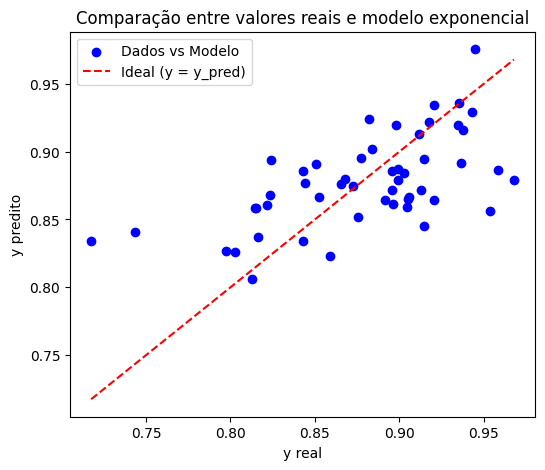

=== Resultado do modelo ===
Variáveis selecionadas: ['Fe ppm', 'Si ppm', 'S ppm', 'C ppm', 'Mn ppm', 'Na ppm']
Equação: y = 8.789e-01 * exp( - 3.19e-07*(Fe ppm) + 3.28e-10*(Si ppm) + 1.37e-05*(S ppm) - 4.22e-05*(C ppm) + 6.77e-06*(Mn ppm) + 3.39e-06*(Na ppm) )
R² = 0.3619 | R² ajustado = 0.2748
AIC = -308.10 | BIC = -294.57 | RMSE = 0.043


In [ ]:
model1E = exp_model(X,y)
print("=== Resultado do modelo ===")
print("Variáveis selecionadas:", model1E["variaveis"])
print("Equação:", model1E["equacao"])
print(f"R² = {model1E['r2']:.4f} | R² ajustado = {model1E['r2_ajustado']:.4f}")
print(f"AIC = {model1E['aic']:.2f} | BIC = {model1E['bic']:.2f} | RMSE = {model1E['rmse']:.3f}")

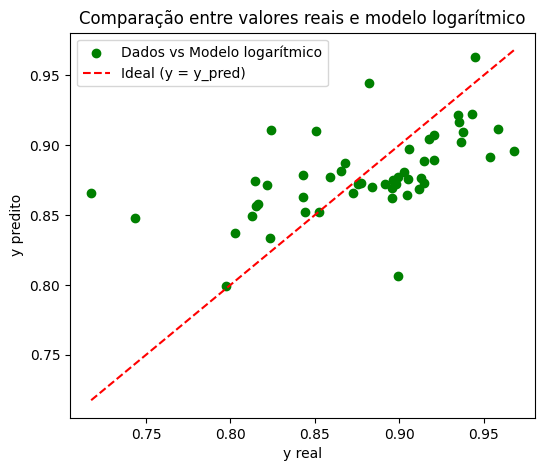

=== Resultado do modelo ===
Variáveis selecionadas: ['Si ppm', 'U ppm', 'P ppm', 'Na ppm']
Equação: y = 8.356e-03 + 4.27e-02*ln(Si ppm) + 2.79e-02*ln(U ppm) + 3.06e-02*ln(P ppm) + 9.44e-03*ln(Na ppm)
R² = 0.3091 | R² ajustado = 0.2491
AIC = -308.05 | BIC = -298.39 | RMSE = 0.044


In [ ]:
model1L = log_model(X,y)
print("=== Resultado do modelo ===")
print("Variáveis selecionadas:", model1L["variaveis"])
print("Equação:", model1L["equacao"])
print(f"R² = {model1L['r2']:.4f} | R² ajustado = {model1L['r2_ajustado']:.4f}")
print(f"AIC = {model1L['aic']:.2f} | BIC = {model1L['bic']:.2f} | RMSE = {model1L['rmse']:.3f}")

## [2]APLICAÇÃO DOS SEGUNDOS MODELOS

In [ ]:
df_temp_flotation = df_temp_flotation.loc[y.index]

In [ ]:
df_temp_flotation = df_temp_flotation.replace([np.inf, -np.inf], np.nan).dropna()
y2 = y.loc[df_temp_flotation.index]


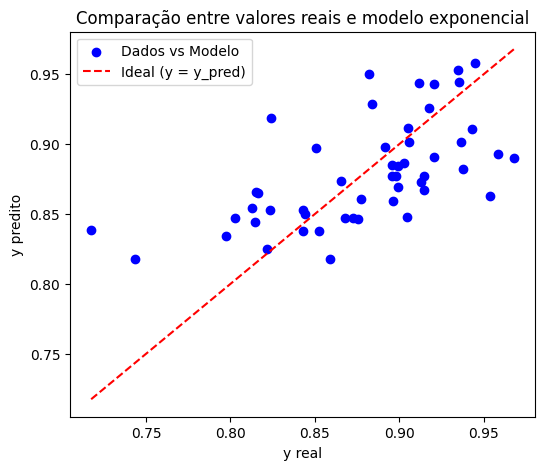

=== Resultado do modelo ===
Variáveis selecionadas: ['(Fe ppm*Si ppm)', '(C ppm/S ppm)', '(Mn ppm+Na ppm)', '(Si ppm*Na ppm)', 'F ppm', 'P ppm', '(S ppm/Fe ppm)', '(C ppm/Mn ppm)', 'Ca ppm', '(Mn ppm*Na ppm)']
Equação: y = 1.000e+00 * exp( - 4.50e-12*((Fe ppm*Si ppm)) - 6.05e-09*((C ppm/S ppm)) + 1.07e-05*((Mn ppm+Na ppm)) - 3.05e-11*((Si ppm*Na ppm)) - 4.34e-06*(F ppm) + 4.80e-05*(P ppm) + 7.20e-10*((S ppm/Fe ppm)) + 4.22e-09*((C ppm/Mn ppm)) - 2.07e-06*(Ca ppm) - 6.48e-10*((Mn ppm*Na ppm)) )
R² = 0.3557 | R² ajustado = 0.1946
AIC = -299.61 | BIC = -278.36 | RMSE = 0.043


In [ ]:
model2E = exp_model(df_temp_flotation,y2)
print("=== Resultado do modelo ===")
print("Variáveis selecionadas:", model2E["variaveis"])
print("Equação:", model2E["equacao"])
print(f"R² = {model2E['r2']:.4f} | R² ajustado = {model2E['r2_ajustado']:.4f}")
print(f"AIC = {model2E['aic']:.2f} | BIC = {model2E['bic']:.2f} | RMSE = {model2E['rmse']:.3f}")

Aviso: 765 valores negativos detectados — convertendo para positivos.


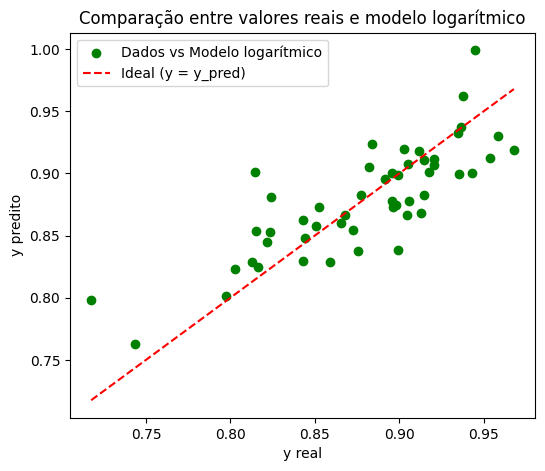

=== Resultado do modelo ===
Variáveis selecionadas: ['(Si ppm*S ppm)', '(Mn ppm+Na ppm)', '(C ppm*Mn ppm)', 'P ppm', '(Mn ppm - S ppm)', 'Ag/Cu_ratio', 'U ppm', 'K ppm', '(Fe ppm+Si ppm)', '(Fe ppm - Si ppm)', 'Fe+Ca/S_ratio', '(Na ppm - S ppm)']
Equação: y = -2.639e-01 - 6.58e-02*ln((Si ppm*S ppm)) + 6.15e-02*ln((Mn ppm+Na ppm)) - 2.46e-02*ln((C ppm*Mn ppm)) + 3.56e-02*ln(P ppm) + 1.37e-02*ln((Mn ppm - S ppm)) + 8.21e-02*ln(Ag/Cu_ratio) + 7.93e-02*ln(U ppm) + 2.55e-02*ln(K ppm) + 2.13e-01*ln((Fe ppm+Si ppm)) - 2.05e-02*ln((Fe ppm - Si ppm)) - 8.01e-02*ln(Fe+Ca/S_ratio) - 1.09e-02*ln((Na ppm - S ppm))
R² = 0.6524 | R² ajustado = 0.5427
AIC = -327.08 | BIC = -301.97 | RMSE = 0.031


In [ ]:

model2L = log_model(df_temp_flotation,y2)
print("=== Resultado do modelo ===")
print("Variáveis selecionadas:", model2L["variaveis"])
print("Equação:", model2L["equacao"])
print(f"R² = {model2L['r2']:.4f} | R² ajustado = {model2L['r2_ajustado']:.4f}")
print(f"AIC = {model2L['aic']:.2f} | BIC = {model2L['bic']:.2f} | RMSE = {model2L['rmse']:.3f}")

***
# <font size = 12 color = RED> REFERÊNCIAS BIBLIOGRÁFRICAS </font>
***

ANDRADE, Rayssa Victória de. Modelagem geometalúrgica do tamanho de produto da prensa de rolos de alta pressão de uma mina de ferro. 2024. Monografia (Trabalho de Conclusão de Curso) - Departamento de Engenharia de Minas, Universidade Federal de Minas Gerais, Belo Horizonte, 2024.



https://blog.deepsim.ca/stepwise-regression-package-python/

https://www.statology.org/exponential-regression-python/

https://www.statology.org/logarithmic-regression-python/

GeoMet dataset - https://zenodo.org/records/7051975

Ratios in Geometallurgy - https://www.youtube.com/watch?v=tfxkDFJY9lE

## SCRATCH LOGARITHMIC AND EXPONENCIAL REGRESSION

### logarithmic

In [ ]:
xL = np.arange(1, 16, 1)
yL = np.array([59, 50, 44, 38, 33, 28, 23, 20, 17, 15, 13, 12, 11, 10, 9.5])

NameError: name 'np' is not defined

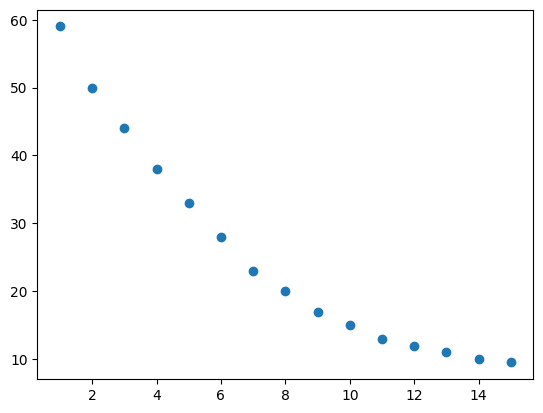

In [ ]:
plt.scatter(xL, yL)
plt.show()

In [ ]:
#fit the model
fit = np.polyfit(np.log(xL), yL, 1)

#view the output of the model
print(fit)

[-20.19869943  63.06859979]


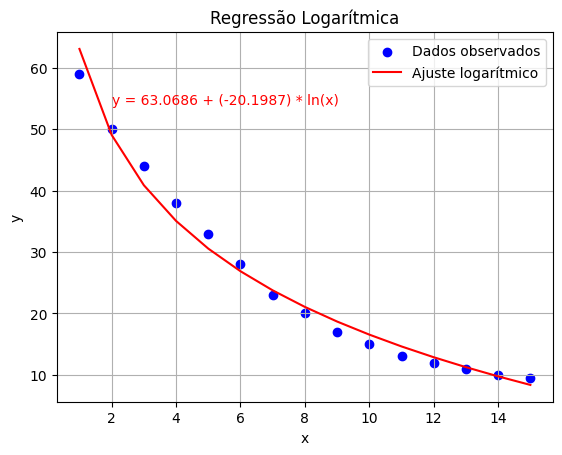

In [ ]:
b, a = fit  # b é o coeficiente angular, a é o intercepto

# gerar valores preditos
y_pred = a + b * np.log(xL)

# plotar dados originais e curva ajustada
plt.scatter(xL, yL, color='blue', label='Dados observados')
plt.plot(xL, y_pred, color='red', label='Ajuste logarítmico')

# exibir equação no gráfico
equacao = f"y = {a:.4f} + ({b:.4f}) * ln(x)"
plt.text(2, max(yL)-5, equacao, fontsize=10, color='red')

# rótulos e legenda
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressão Logarítmica')
plt.legend()
plt.grid(True)
plt.show()


###Exponetial

In [ ]:

xx = np.arange(1, 21, 1)
yx = np.array([1, 3, 5, 7, 9, 12, 15, 19, 23, 28,
              33, 38, 44, 50, 56, 64, 73, 84, 97, 113])

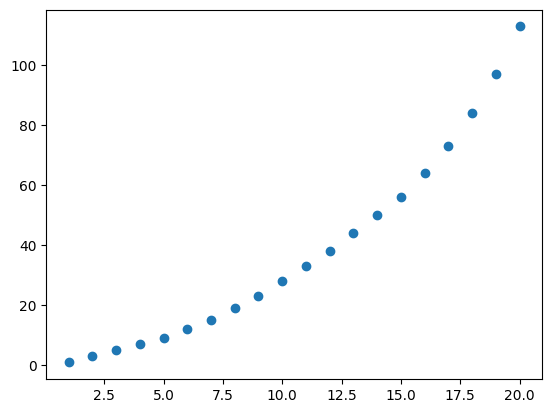

In [ ]:

plt.scatter(xx, yx)
plt.show()

In [ ]:
fit = np.polyfit(xx, np.log(yx), 1)

#view the output of the model
print(fit)



[0.2041002  0.98165772]


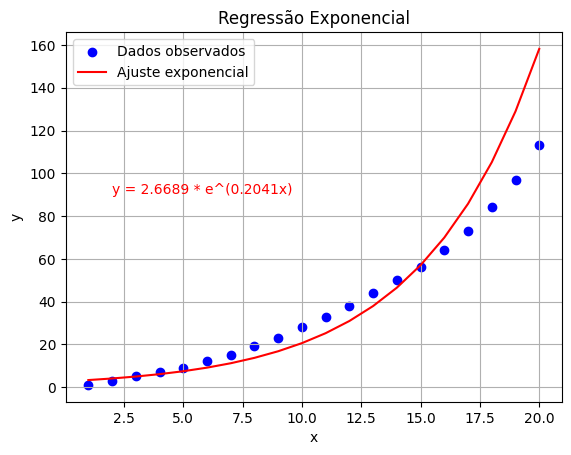

Coeficiente de determinação (R²): 0.8085
Equação: y = 2.6689 * e^(0.2041x)


In [ ]:
b, ln_a = fit  # b = coeficiente angular, ln_a = ln(a)
a = np.exp(ln_a)

# gerar valores preditos
y_pred = a * np.exp(b * xx)

# plotar dados e curva ajustada
plt.scatter(xx, yx, color='blue', label='Dados observados')
plt.plot(xx, y_pred, color='red', label='Ajuste exponencial')

# exibir equação no gráfico
equacao = f"y = {a:.4f} * e^({b:.4f}x)"
plt.text(2, max(yx)*0.8, equacao, fontsize=10, color='red')

# rótulos e legenda
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressão Exponencial')
plt.legend()
plt.grid(True)
plt.show()

# calcular R²
ss_res = np.sum((yx - y_pred) ** 2)
ss_tot = np.sum((yx - np.mean(yx)) ** 2)
r2 = 1 - (ss_res / ss_tot)

print(f"Coeficiente de determinação (R²): {r2:.4f}")
print(f"Equação: y = {a:.4f} * e^({b:.4f}x)")

Equação do modelo:
y = 2.810 * exp( + 0.759*X1 - 0.301*X2)

R² = 0.9912


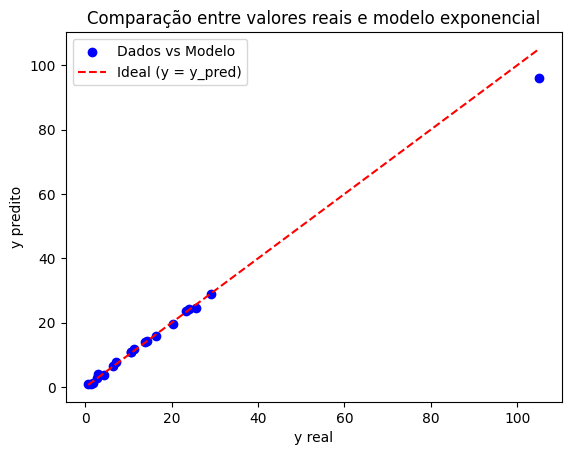

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ==== Exemplo de dados ====
X = np.random.rand(20, 2) * 5
y = 2.5 * np.exp(0.8 * X[:, 0] - 0.3 * X[:, 1]) + np.random.normal(0, 0.5, 20)

# ==== Linearização ====
Y_log = np.log(y)
X_ones = np.column_stack((np.ones(X.shape[0]), X))

# ==== Ajuste linear ====
coef = np.linalg.lstsq(X_ones, Y_log, rcond=None)[0]
a_est = np.exp(coef[0])  # intercepto (exp do B0)
b_est = coef[1:]         # coeficientes das variáveis

# ==== Predição ====
y_pred = a_est * np.exp(X @ b_est)

# ==== R² ====
r2 = 1 - np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2)

# ==== Equação final ====
equacao = f"y = {a_est:.3f} * exp("
if b_est.ndim == 0:  # caso escalar
    equacao += f"{b_est:.3f}*X"
else:
    for i, b in enumerate(b_est):
        sinal = " + " if b >= 0 else " - "
        equacao += f"{sinal}{abs(b):.3f}*X{i+1}"
equacao += ")"

# ==== Exibição ====
print("Equação do modelo:")
print(equacao)
print(f"\nR² = {r2:.4f}")

# ==== Gráfico comparativo ====
plt.scatter(y, y_pred, color="blue", label="Dados vs Modelo")
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', label="Ideal (y = y_pred)")
plt.xlabel("y real")
plt.ylabel("y predito")
plt.title("Comparação entre valores reais e modelo exponencial")
plt.legend()
plt.show()
